In [2]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# directory = 'results/rl_caching_strategy_only/2019_04_12_22_34/caching_strategy'
# directory = 'results/notebooks/rl_caching_strategy_only/caching_strategy'
directory = 'results/rl_caching_strategy_only_no_episodes/2019_04_14_19_07/caching_strategy'

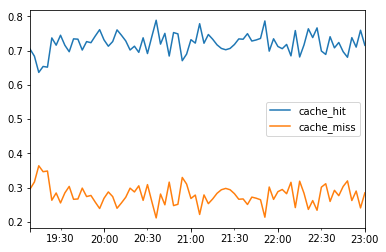

In [39]:
stats_df = pd.read_csv(f'{directory}/stats_logger.log', names=['ignored', 'key', 'cache_hit', 'cache_miss'], parse_dates=True)

stats_df = stats_df.drop(['ignored'], axis=1)
cache_hit_ratio = stats_df['cache_hit'].sum()/stats_df['cache_hit'].count()
cache_miss_ratio = stats_df['cache_miss'].sum()/stats_df['cache_miss'].count()
# stats_df.head(3)
stats_df.resample('3T').mean().plot()
# stats_df.groupby('episode').mean().plot()


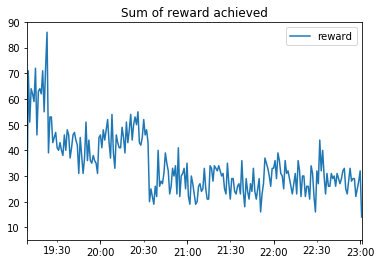

In [28]:
# Useful to compare various RL architecture 
episode_reward_df = pd.read_csv(f'{directory}/reward_logger.log', names=['ignored', 'reward'], parse_dates=True)
episode_reward_df =episode_reward_df.drop(['ignored'], axis=1)
episode_reward_df.resample('1T').sum().plot(title='Sum of reward achieved')
# ax = episode_reward_df.plot(title='Reward across episodes.')
# ax.set_xlabel("episode")
# TODO allow multiple runs
# mean = episode_reward_df.mean()
# errors = episode_reward_df.std()
# fig, ax = plt.subplots()
# mean.plot.bar(yerr=errors, ax=ax, capsize=4)


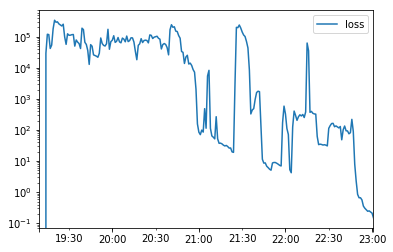

In [37]:
losses_df = pd.read_csv(f'{directory}/loss_logger.log', names=['ignored','loss'], parse_dates=True)
losses_df = losses_df.drop(['ignored'], axis=1)
losses_df.resample('1T').sum().plot(logy=True)

In [7]:
# losses_df.resample('1T').quantile(0.9).plot()
